## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.01, 0.1, 0.95, 1.95]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mt in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mt)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mt-%s" % str(mt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0715 20:49:17.580600 140017511434048 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0715 20:49:17.581909 140017511434048 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0715 20:49:17.609331 140017511434048 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 20:49:17.610064 140017511434048 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The n

Experiment with MOMENTUM = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.0327 - acc: 0.2600 - val_loss: 1.9681 - val_acc: 0.2803
Epoch 2/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.8703 - acc: 0.3355 - val_loss: 1.8478 - val_acc: 0.3354
Epoch 3/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.8018 - acc: 0.3637 - val_loss: 1.8028 - val_acc: 0.3692
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7544 - acc: 0.3846 - val_loss: 1.8266 - val_acc: 0.3569
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7154 - acc: 0.3977 - val_loss: 1.6945 - val_acc: 0.4055
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6807 - acc: 0.4100 - val_loss: 1.8067 - val_acc: 0.3643
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6539 - acc: 0.4192 - val_loss: 1.7905 - 

Epoch 2/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5945 - acc: 0.4357 - val_loss: 1.5682 - val_acc: 0.4419
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5045 - acc: 0.4668 - val_loss: 1.4872 - val_acc: 0.4729
Epoch 4/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4415 - acc: 0.4893 - val_loss: 1.6035 - val_acc: 0.4311
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.3998 - acc: 0.5033 - val_loss: 1.5253 - val_acc: 0.4633
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.3562 - acc: 0.5195 - val_loss: 1.4014 - val_acc: 0.5057
Epoch 7/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.3107 - acc: 0.5343 - val_loss: 1.4342 - val_acc: 0.4858
Epoch 8/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.2837 - acc: 0.5450 - val_loss: 1.4307 - val_acc: 0.4954
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 111us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 111us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 110us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 111us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 135us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 112us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 112us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 6s 116us/step - loss: nan - 

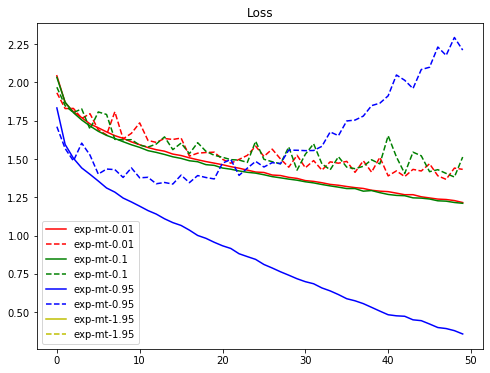

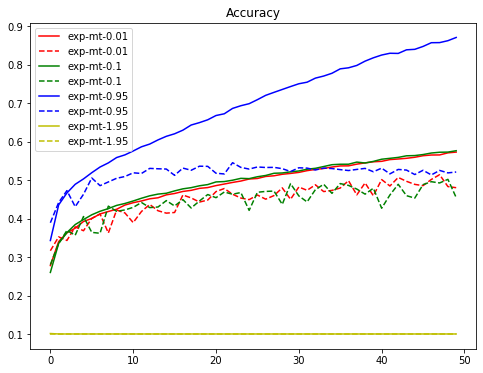

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()